In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

## Statistical population

In [53]:
statistical_population = np.random.RandomState(13). \
    normal(loc=100, scale=10, size=1000000)

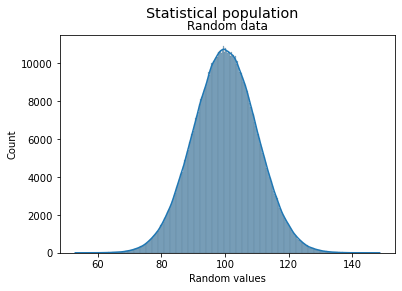

In [54]:
sns.histplot(statistical_population, kde=True).set(
    xlabel='Random values', title='Random data')
plt.suptitle('Statistical population', fontsize='x-large');

In [55]:
print('Measure of central tendency')
print('Data: Statistical population \n')
print('Median:', np.median(statistical_population))
print('Mean:', np.mean(statistical_population))
print('Mode:', st.mode(statistical_population)[0][0], 
', count:', st.mode(statistical_population)[1][0])


Measure of central tendency
Data: Statistical population 

Median: 99.98983580557922
Mean: 99.98656650769469
Mode: 52.90592251853312 , count: 1


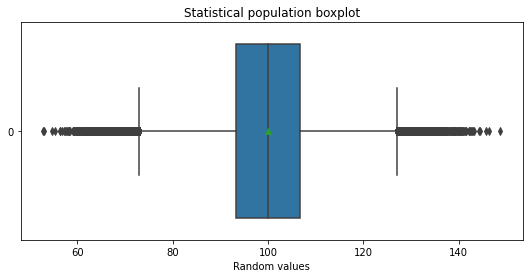

In [56]:
plt.figure(figsize=(9,4))
sns.boxplot(data=statistical_population, orient='h', showmeans=True)\
    .set(xlabel='Random values', title='Statistical population boxplot');

In [57]:
print('Descriptive statistics')
print('Data: Statistical population')
pd.Series(statistical_population).describe()

Descriptive statistics
Data: Statistical population


count    1000000.000000
mean          99.986567
std            9.995303
min           52.905923
25%           93.242903
50%           99.989836
75%          106.740951
max          148.605931
dtype: float64

In [58]:
print('Measure of statistical variability')
print('Data: Statistical population \n')
print('Variance:', np.var(statistical_population))
print('Standart deviation:', np.std(statistical_population))
q75, q25 = np.percentile(statistical_population, [75 ,25])
iqr = q75 - q25
print('IQR:', iqr)
print('Range:', np.ptp(statistical_population))

Measure of statistical variability
Data: Statistical population 

Variance: 99.90598849635927
Standart deviation: 9.995298319528
IQR: 13.498047556239129
Range: 95.70000860495321


## Simple random sample

In [59]:
size=100
simple_rs = np.random.RandomState(13).choice(statistical_population, size=size)

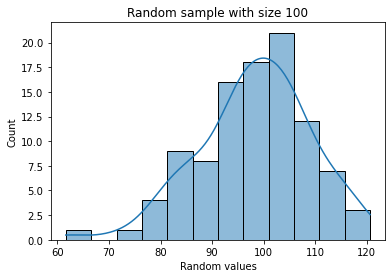

In [60]:
sns.histplot(simple_rs, kde=True).set(
    xlabel='Random values', 
    title='Random sample with size {}'.format(size));

In [61]:
print('Measure of central tendency')
print('Data: Simple random sample \n')
print('Median:', np.median(simple_rs))
print('Mean:', np.mean(simple_rs))
print('Mode:', st.mode(simple_rs)[0][0], 
', count:', st.mode(simple_rs)[1][0])


Measure of central tendency
Data: Simple random sample 

Median: 99.2388681804097
Mean: 98.31110895477383
Mode: 61.62795949655577 , count: 1


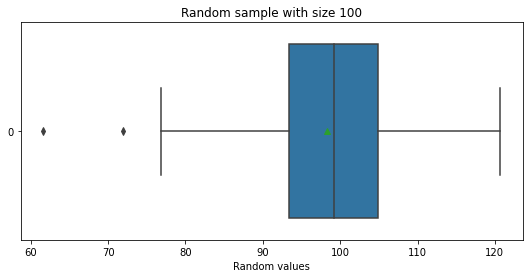

In [62]:
plt.figure(figsize=(9,4))
sns.boxplot(data=simple_rs, orient='h', showmeans=True)\
    .set(xlabel='Random values', 
         title='Random sample with size {}'.format(size));

In [63]:
print('Descriptive statistics')
print('Data: Simple random sample')
pd.Series(simple_rs).describe()

Descriptive statistics
Data: Simple random sample


count    100.000000
mean      98.311109
std       10.764710
min       61.627959
25%       93.414392
50%       99.238868
75%      104.836084
max      120.660697
dtype: float64

In [64]:
print('Measure of statistical variability')
print('Data: Simple random sample \n')
ddof = 1
print('Degrees of Freedom:', ddof)
print('Variance:', np.var(simple_rs, ddof=ddof))
print('Standart deviation:', np.std(simple_rs, ddof=1))
q75, q25 = np.percentile(simple_rs, [75 ,25])
iqr = q75 - q25
print('IQR:', iqr)
print('Range:', np.ptp(simple_rs))

Measure of statistical variability
Data: Simple random sample 

Degrees of Freedom: 1
Variance: 115.87899020105088
Standart deviation: 10.764710409530341
IQR: 11.421692496668484
Range: 59.03273772465588


### Z-transform

In [65]:
simple_rs_z = np.array(
    [(i - np.mean(simple_rs))/np.std(simple_rs, ddof=1) for i in simple_rs])

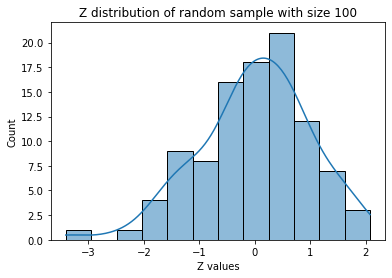

In [66]:
sns.histplot(simple_rs_z, kde=True)\
    .set(title='Z distribution of random sample with size {}'.format(size), 
         xlabel='Z values');

In [67]:
print('Descriptive statistics')
print('Data: Simple random sample with Z-transform')
pd.Series(simple_rs_z).describe()

Descriptive statistics
Data: Simple random sample with Z-transform


count    1.000000e+02
mean    -1.902922e-15
std      1.000000e+00
min     -3.407723e+00
25%     -4.548861e-01
50%      8.618525e-02
75%      6.061450e-01
max      2.076190e+00
dtype: float64

### Central limit theorem

In [70]:
se_srs = np.std(simple_rs, ddof=1)/np.sqrt(len(simple_rs))
print('Mean of statistical population: \n',
        np.mean(statistical_population), '\n')
print('Mean of Simple random sample: \n',
        np.mean(simple_rs), '\n')

print('95% confidence interval for mean of statistical population:\n', 
        np.mean(simple_rs)-1.96*se_srs, np.mean(simple_rs)+1.96*se_srs)
print('with values in Simple random sample n =', size)

Mean of statistical population: 
 99.98656650769469 

Mean of Simple random sample: 
 98.31110895477383 

95% confidence interval for mean of statistical population:
 96.20122571450588 100.42099219504178
with values in Simple random sample n = 100


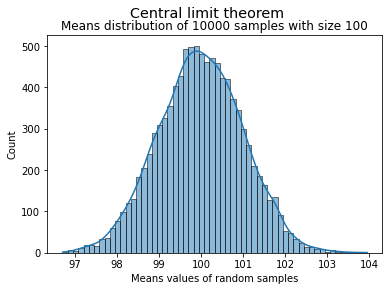

In [72]:
range = 10000
size = 100
values = []
for i in np.arange(range):
    values.append(np.random.choice(statistical_population, size=size).mean())

sns.histplot(values, kde=True).set(
    xlabel='Means values of random samples', 
    title='Means distribution of {} samples with size {}'.format(range, size))
plt.suptitle('Central limit theorem', fontsize='x-large');

### Z distribution

In [73]:
print('Z distribution \n')
print('Sample size: \n', size)
se = np.std(statistical_population)/np.sqrt(len(simple_rs))
print('Standart error of statistical population: \n', se)
print('Mean of simple_rs: \n', np.mean(simple_rs))
z = (np.mean(simple_rs) - np.mean(statistical_population)) / se
print('Z value: \n', z)
print('p-value: \n', st.norm.sf(abs(z))*2)

Z distribution 

Sample size: 
 100
Standart error of statistical population: 
 0.9995298319528001
Mean of simple_rs: 
 98.31110895477383
Z value: 
 -1.676245670074187
p-value: 
 0.09369008192825284


### T distribution

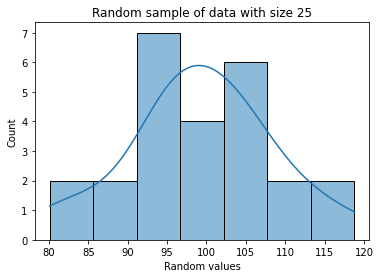

In [74]:
size=25
sample = np.random.RandomState(13).choice(statistical_population, size=size)
sns.histplot(sample, kde=True).set(
    xlabel='Random values', title='Random sample of data with size {}'.format(size));

In [75]:
print('T distribution \n')
print('Sample size: \n', size)
se = np.std(sample, ddof=1)/np.sqrt(len(sample))
print('Standart error of sample: \n', se)
print('Mean of sample: \n', np.mean(sample))
t = (np.mean(sample) - np.mean(statistical_population)) / se
print('T value: \n', t)
print('p-value: \n', st.t.sf(abs(t), df=(size-1))*2)

T distribution 

Sample size: 
 25
Standart error of sample: 
 1.8264957873237133
Mean of sample: 
 99.23842982263294
T value: 
 -0.4096021957750939
p-value: 
 0.6857306730181945


In [76]:
print('Z distribution \n')
print('Sample size: \n', size)
se = np.std(statistical_population)/np.sqrt(len(sample))
print('Standart error of Statistical population: \n', se)
print('Mean of sample: \n', np.mean(sample))
z = (np.mean(sample) - np.mean(statistical_population)) / se
print('Z value: \n', z)
print('p-value: \n', st.norm.sf(abs(z))*2)

Z distribution 

Sample size: 
 25
Standart error of Statistical population: 
 1.9990596639056002
Mean of sample: 
 99.23842982263294
Z value: 
 -0.3742443002426968
p-value: 
 0.708222567851873


### Student's t-test

In [77]:
size = 100
sample_one = np.random.RandomState(13).choice(statistical_population, size=size)
sample_two = np.random.RandomState(12345).choice(statistical_population, size=size)

print('Student\'s t-test \n')
print('Samples size: \n', size)

mean_one = np.mean(sample_one)
mean_two = np.mean(sample_two)

print('Mean of sample_one: \n', mean_one)
print('Mean of sample_two: \n', mean_two)

t = (mean_one - mean_two) / np.sqrt(
    np.std(sample_one, ddof=1)**2/len(sample_one) \
        + np.std(sample_two, ddof=1)**2/len(sample_two)
)

print('T value: \n', t)
print('p-value: \n', st.t.sf(abs(t), df=(size+size-2))*2)

Student's t-test 

Samples size: 
 100
Mean of sample_one: 
 98.31110895477383
Mean of sample_two: 
 100.75712684278967
T value: 
 -1.728237020958537
p-value: 
 0.08550475277152561


In [211]:
size = 25
sample_one = np.random.RandomState(13).choice(statistical_population, size=size)
sample_two = np.random.RandomState(12345).choice(statistical_population, size=size)

print('Student\'s t-test \n')
print('Samples size: \n', size)

mean_one = np.mean(sample_one)
mean_two = np.mean(sample_two)

print('Mean of sample_one: \n', mean_one)
print('Mean of sample_two: \n', mean_two)

t = (mean_one - mean_two) / np.sqrt(
    np.std(sample_one, ddof=1)**2/len(sample_one) \
        + np.std(sample_two, ddof=1)**2/len(sample_two)
)

print('T value: \n', t)
print('p-value: \n', st.t.sf(abs(t), df=(size+size-2))*2)

Student's t-test 

Samples size: 
 25
Mean of sample_one: 
 99.23842982263294
Mean of sample_two: 
 102.1393184661322
T value: 
 -1.028272856373601
p-value: 
 0.3089754309765145


In [83]:
print('Confidence interval with scipy.stats.t.interval', '\n')

print('Mean of sample_one:', mean_one)
print('95% confidence interval in sample_one')
print(st.t.interval(
    alpha=0.95, 
    df=len(sample_one)-1, 
    loc=np.mean(sample_one), 
    scale=st.sem(sample_one)), '\n')

print('Mean of sample_two:', mean_two)
print('95% confidence interval in sample_two')
print(st.t.interval(
    alpha=0.95, 
    df=len(sample_two)-1, 
    loc=np.mean(sample_two), 
    scale=st.sem(sample_two)))

Confidence interval with scipy.stats.t.interval 

Mean of sample_one: 98.31110895477383
95% confidence interval in sample_one
(96.17515686750662, 100.44706104204104) 

Mean of sample_two: 100.75712684278967
95% confidence interval in sample_two
(98.93385245447729, 102.58040123110206)


In [84]:
print('Confidence interval manual with scipy.stats.t.ppf', '\n')

p = 0.95
k = st.t.ppf((1 + p)/2, size-1)

for x in sample_one, sample_two:
    name = [y for y in globals() if id(x) == id(globals()[y])][0]
    print('Mean of {}:'.format(name), np.mean(x))
    print('95% confidence interval for {}'.format(name)
        )
    print((np.mean(x) - k*np.std(x, ddof=1)/np.sqrt(len(x)),
    np.mean(x) + k*np.std(x, ddof=1)/np.sqrt(len(x))), '\n')

Confidence interval manual with scipy.stats.t.ppf 

Mean of sample_one: 98.31110895477383
95% confidence interval for sample_one
(96.17515686750662, 100.44706104204104) 

Mean of sample_two: 100.75712684278967
95% confidence interval for sample_two
(98.93385245447729, 102.58040123110206) 



Plotting samples mean... 

Use auto sns.pointplot and sns.boxplot


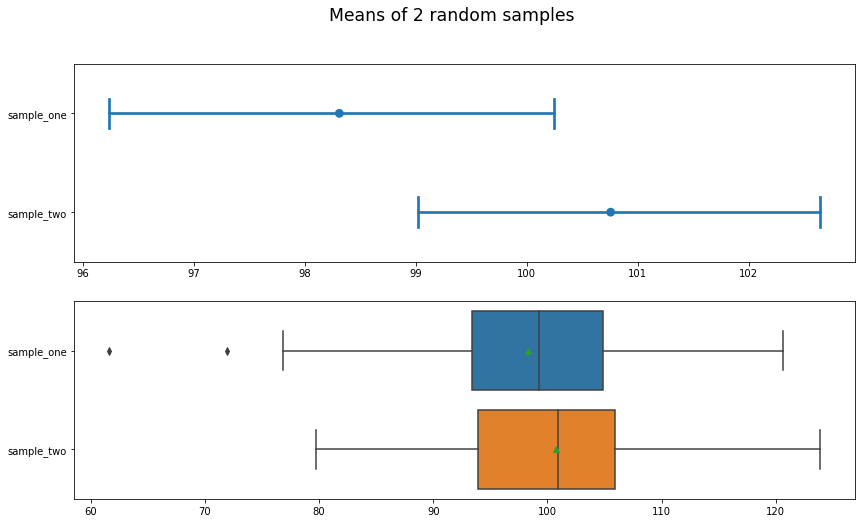

In [88]:
print('Plotting samples mean... \n')
print('Use auto sns.pointplot and sns.boxplot')
fig, ax = plt.subplots(2, figsize=(14, 8))

sns.pointplot(
    data=[sample_one,sample_two], 
    errorbar=('ci', 95), 
    join=False, 
    capsize=.3,
    seed=13,
    orient='h',
    ax=ax[0]).set(yticklabels=['sample_one', 'sample_two'])

sns.boxplot(data=[sample_one,sample_two], 
showmeans=True,
orient='h', 
ax=ax[1]).set(yticklabels=['sample_one', 'sample_two'])

plt.suptitle('Means of 2 random samples', fontsize='xx-large');

Plotting samples mean... 

Use manualy plt.errorbar and sns.boxplot


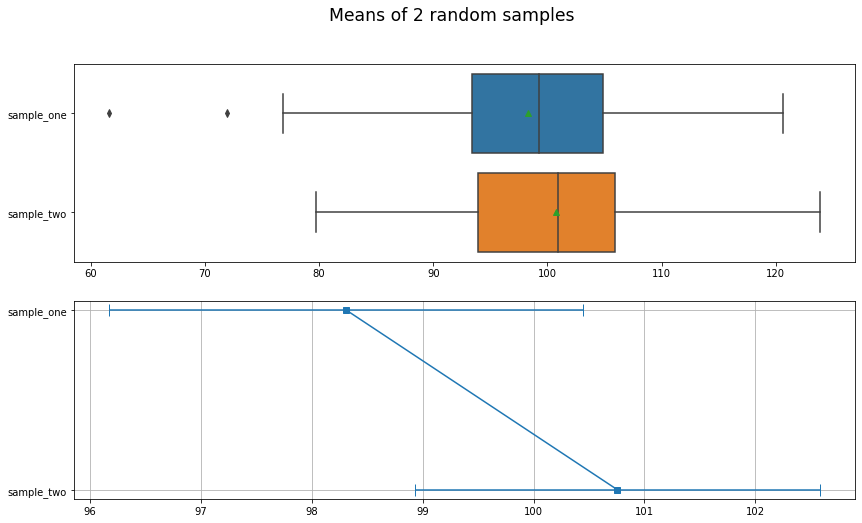

In [90]:
print('Plotting samples mean... \n')
print('Use manualy plt.errorbar and sns.boxplot')
fig, ax = plt.subplots(2, figsize=(14, 8))

se1 = np.std(sample_one, ddof=1)/np.sqrt(len(sample_one))
se2 = np.std(sample_two, ddof=1)/np.sqrt(len(sample_two))
p = 0.95
k = st.t.ppf((1 + p)/2, size-1)

ax[1].errorbar(x=[np.mean(sample_two), np.mean(sample_one)],
                y=['sample_two', 'sample_one'], 
                xerr=[k*se2, k*se1], 
                marker='s', 
                capsize=6)

plt.grid(True)

sns.boxplot(data=[sample_one,sample_two], 
            showmeans=True,
            orient='h', 
            ax=ax[0]).set(yticklabels=['sample_one', 'sample_two'])

plt.suptitle('Means of 2 random samples', fontsize='xx-large');

### QQ plot

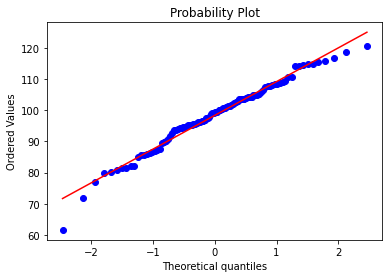

In scipy API reference: 

probplot generates a probability plot, 
which should not be confused with a Q-Q or a P-P plot. 
Statsmodels has more extensive functionality of this type, 
see statsmodels.api.ProbPlot.


In [99]:
st.probplot(sample_one, dist="norm", plot=plt)
plt.show()

print('In scipy API reference: \n')
print('probplot generates a probability plot, \n\
which should not be confused with a Q-Q or a P-P plot. \n\
Statsmodels has more extensive functionality of this type, \n\
see statsmodels.api.ProbPlot.')

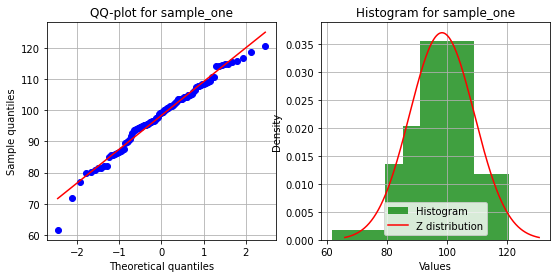

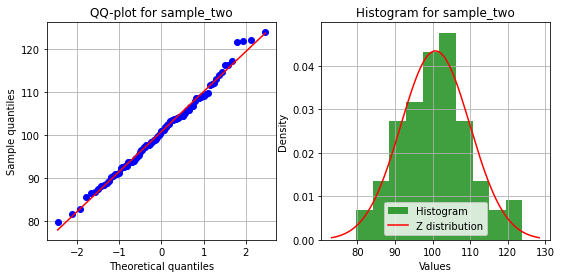

In [115]:
for x in sample_one, sample_two:

    name = [y for y in globals() if id(x) == id(globals()[y])][0]

    plt.figure(figsize = (9, 4)) 

    plt.subplot(1, 2, 1)
    st.probplot(x, dist="norm", plot=plt)
    plt.ylabel('Sample quantiles')
    plt.xlabel('Theoretical quantiles')
    plt.title('QQ-plot for {}'.format(name))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(x, bins=10, density=True, facecolor='g', alpha=0.75, 
                                label='Histogram')

    plt.title('Histogram for {}'.format(name))
    plt.xlabel('Values')
    plt.ylabel('Density')
    #plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')
    plt.grid(True)


    mean = np.mean(x)
    std = np.std(x, ddof=1)

    x = np.linspace(
        mean - 3*std, 
        mean + 3*std, 
        1000)

    plt.plot(x, st.norm.pdf(x, mean, std), color='red', label='Z distribution')

    plt.legend()
    plt.show()

### Shapiro-Wilk test

In [126]:
print('Shapiro-Wilk test for normality \n')
for x in sample_one, sample_two:

    name = [y for y in globals() if id(x) == id(globals()[y])][0]
    print('Data:', name)
    print('p-value: ', st.shapiro(x).pvalue, '\n')

print('Normality p-value > 0.05')

Shapiro-Wilk test for normality 

Data: sample_one
p-value:  0.16168315708637238 

Data: sample_two
p-value:  0.7356678247451782 

Normality p-value > 0.05


### Mann–Whitney U test

In [131]:
size = 15
sample_one = np.random.RandomState(13).choice(statistical_population, size=size)
sample_two = np.random.RandomState(12345).choice(statistical_population, size=size)

In [132]:
print('Mann–Whitney U test')
print('*nonparametric test \n')

print('Data: sample_one, sample_two')
print('Sample size: {}, {}'.format(len(sample_one), len(sample_two)))
print('p-value: ', st.mannwhitneyu(sample_one, sample_two).pvalue, '\n')

print('Normality p-value > 0.05')

Mann–Whitney U test
*nonparametric test 

Data: sample_one, sample_two
Sample size: 15, 15
p-value:  0.5614474146848649 

Normality p-value > 0.05
